**This function changes the working directory of the notebook and imports the training data for the purpose of exploration ** 

In [1]:
import os 
import pandas as pd
os.chdir("../")
train = pd.read_csv("train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

**This function plots the adoption rate classes** 

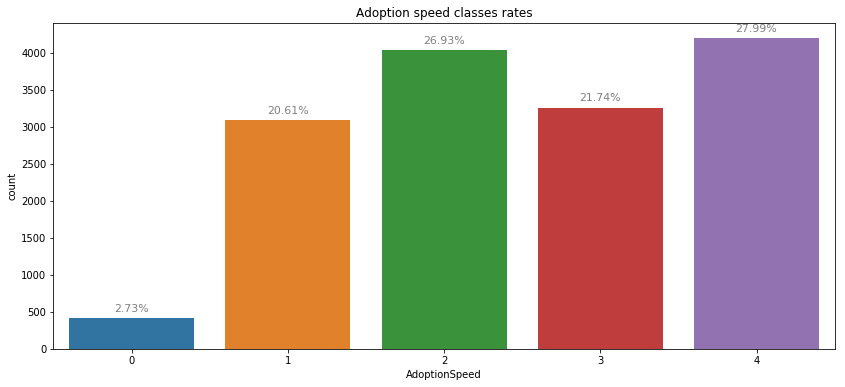

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_adoption_rate_classes(): 
    plt.figure(figsize=(14, 6))
    g = sns.countplot(x='AdoptionSpeed', data=train)
    plt.title('Adoption speed classes rates');
    ax=g.axes
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
             textcoords='offset points')  
plot_adoption_rate_classes()

**This function plots the number of cats vs dogs in the training dataset ** 

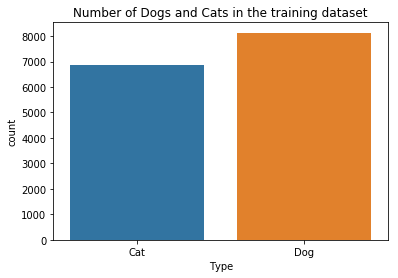

In [5]:
def change_type_annotation(): 
    train['Type'] = train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

def plot_type():
    change_type_annotation() 
    plt.figure()
    sns.countplot(x = 'Type', data = train)
    plt.title("Number of Dogs and Cats in the training dataset")
plot_type()

**This function compares the number of cats and dogs between in different categories and compares adoption rate speed with the base ones ** 

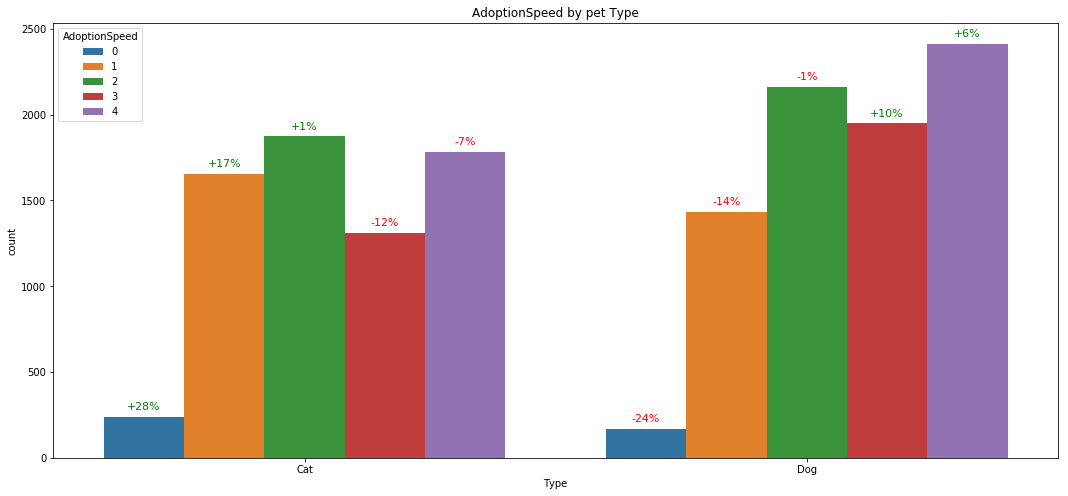

In [13]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
# this is the function that calculates the adoption rate speed of a pet in comparison to the base ones in case the data is split between different pet types
def prepare_plotting_dict(data, feature, main_count): 
    main_count = dict(main_count)
    plot_dict = {}
    
    for i in data[feature].unique():
        val_count = dict(data.loc[data[feature] == i, 'AdoptionSpeed'].value_counts().sort_index()) 
        
        for k, v in main_count.items():
            if k in val_count: 
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0
    return plot_dict 

def make_count_plot(data, x, hue = 'AdoptionSpeed', title = '', main_count = main_count): 
    g = sns.countplot(x=x, data=data, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plotting_dict(data, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')

plt.figure(figsize=(18, 8));
make_count_plot(data = train, x='Type', title='by pet Type')

**This code block adds a new feature (has_name) and shows the distribution of adoption speed with this feature**

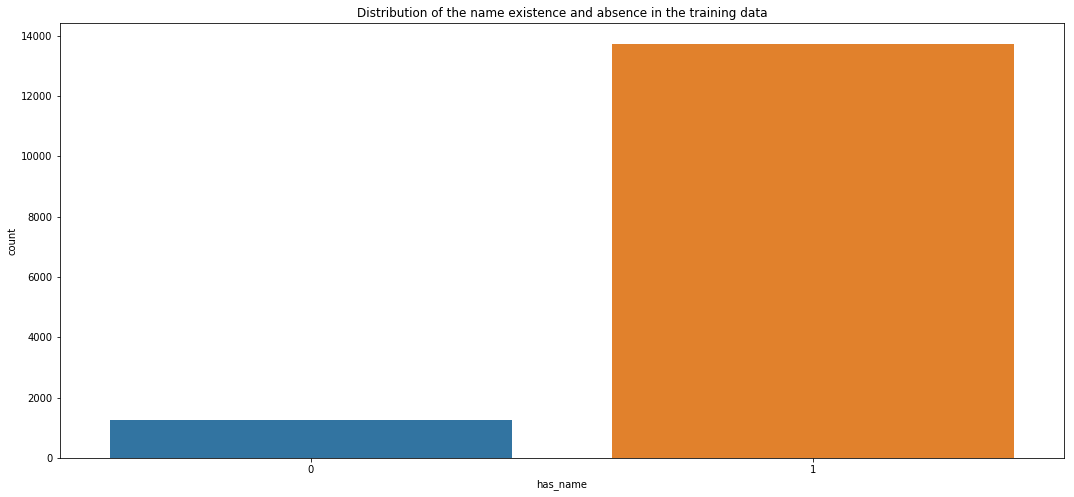

In [16]:
# this function creates the has_name feature
def has_name_feature(): 
    train['has_name'] = 0
    train['Name'] = train['Name'].fillna('Unnamed')
    train.loc[train['Name'] != 'Unnamed', 'has_name'] = 1 

# this function plots the feature
def plot_has_name():
    has_name_feature()
    plt.figure(figsize=(18, 8))
    g = sns.countplot(x = 'has_name', data=train)
    plt.title("Distribution of the name existence and absence in the training data")

plot_has_name()

**This code block shows the age distribution before and after applying the transformation function (3rd root)** 

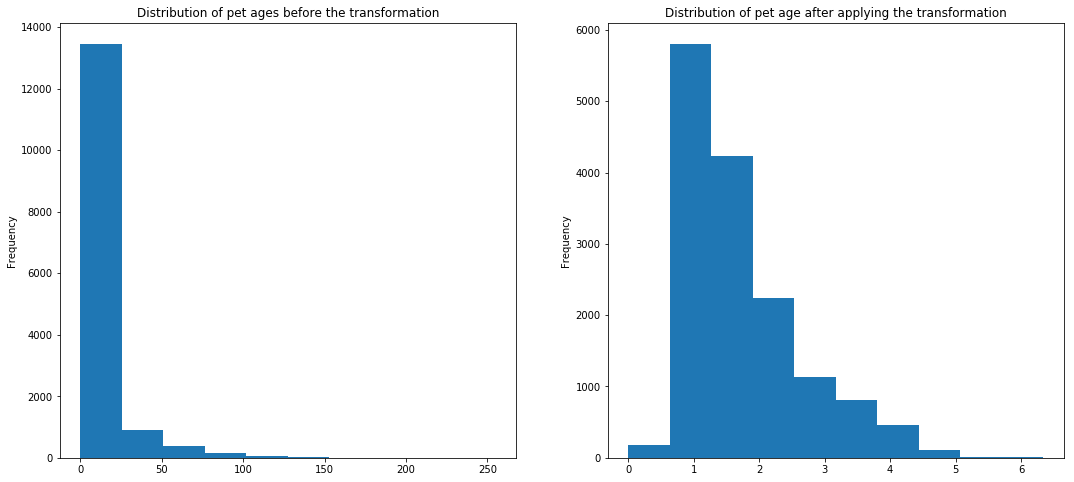

In [19]:
def apply_transformation_age():
    new_age = train['Age']
    new_age = new_age ** (1. / 3)
    return new_age 
    
def plot_before_after_transform():
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.title('Distribution of pet ages before the transformation')
    train['Age'].plot('hist')
    
    new_age = apply_transformation_age()
    plt.subplot(1, 2, 2)
    plt.title("Distribution of pet age after applying the transformation")
    new_age.plot('hist')
    
plot_before_after_transform()

**This code block adds the pure breed feature and plots the distribution of adoption classes accordingly

Text(0.5, 1.0, 'Distribution of pure breed in the training Dataset')

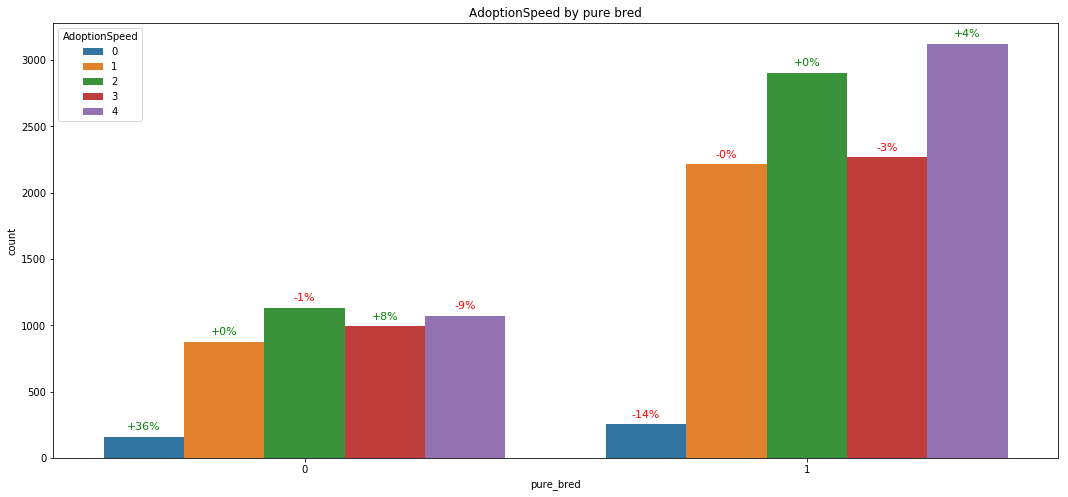

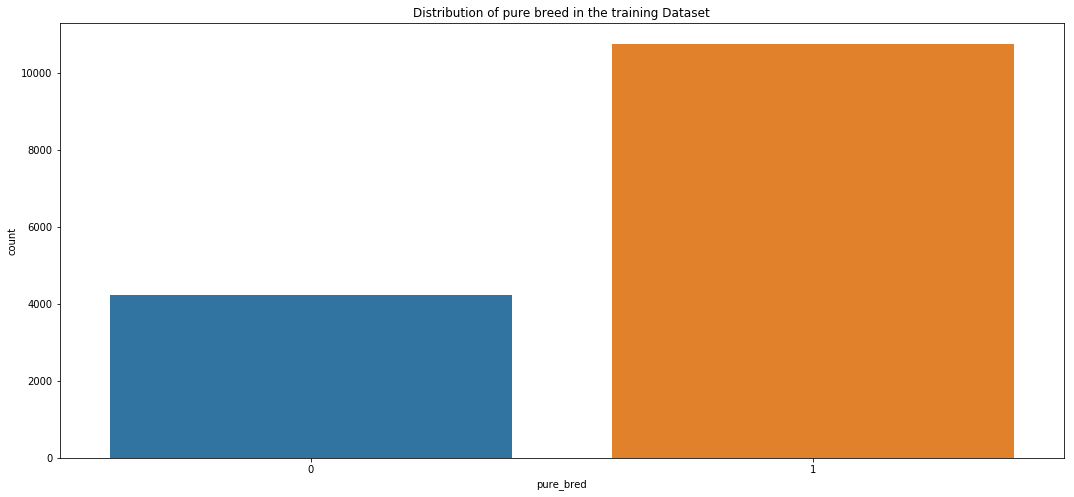

In [25]:
def add_pure_bred_feature(): 
    train['pure_bred'] = 0
    train.loc[train['Breed2'] == 0, 'pure_bred'] = 1
    
add_pure_bred_feature()
plt.figure(figsize=(18, 8))
make_count_plot(data = train, x = 'pure_bred', title = 'by pure bred')
plt.figure(figsize=(18, 8))
g = sns.countplot(x = 'pure_bred', data=train)
plt.title("Distribution of pure breed in the training Dataset")

**This function plots the distribution of adoption speeds as a variation of the furlength and maturity size** 

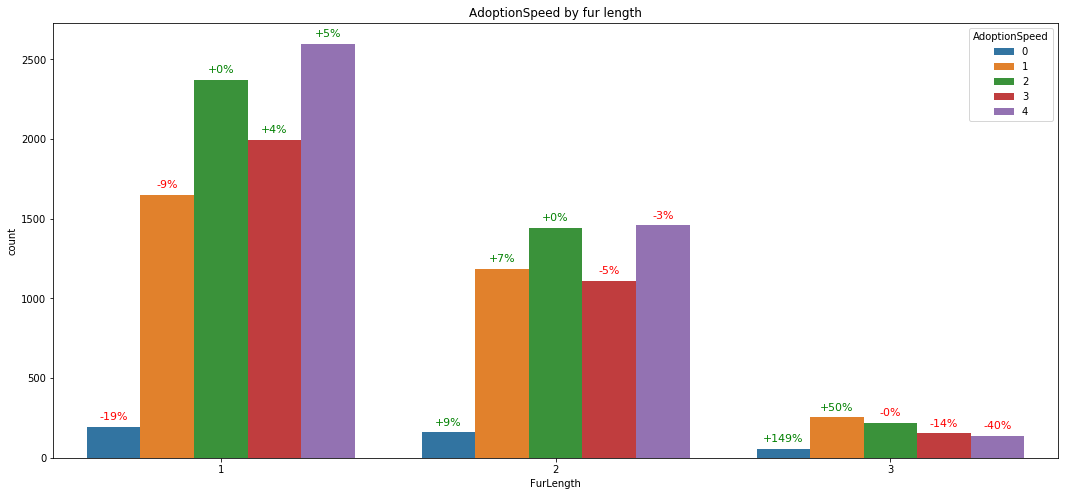

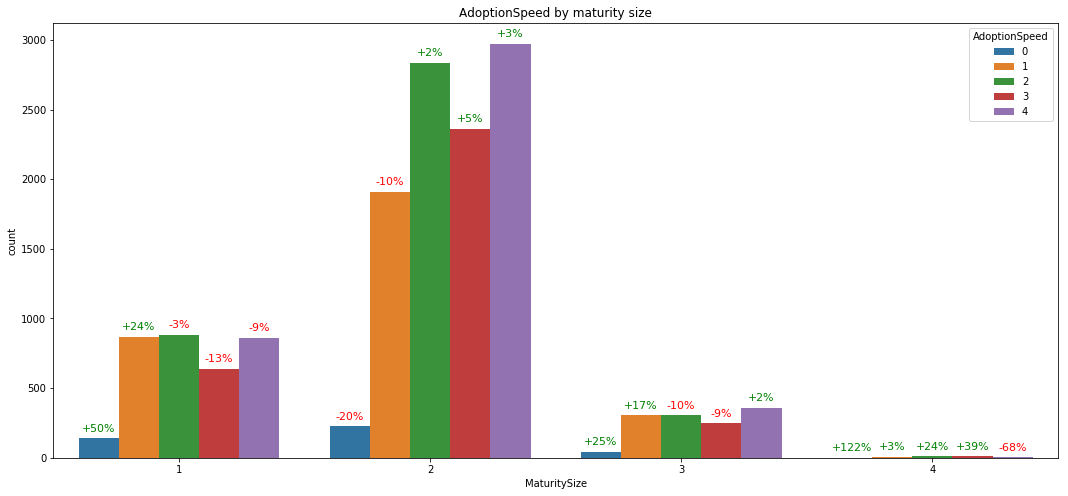

In [26]:
plt.figure(figsize=(18,8))
make_count_plot(data = train, x = 'FurLength', title = 'by fur length')
plt.figure(figsize=(18,8))
make_count_plot(data=train, x = 'MaturitySize', title='by maturity size')

**This code block inllustrates the adoption speed as a function of the health conditions ** 

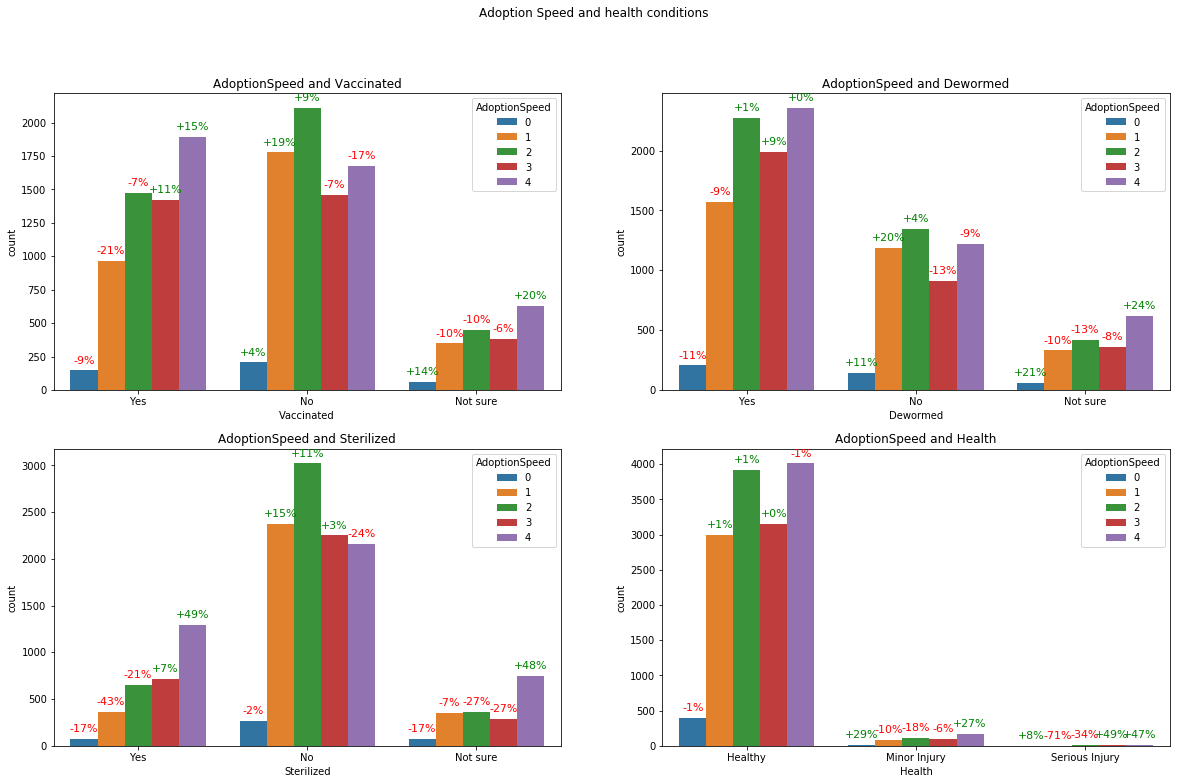

In [27]:
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(data=train, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Vaccinated');

plt.subplot(2, 2, 2)
make_count_plot(data=train, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Dewormed');

plt.subplot(2, 2, 3)
make_count_plot(data=train, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Sterilized');

plt.subplot(2, 2, 4)
make_count_plot(data=train, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);
plt.title('AdoptionSpeed and Health');

plt.suptitle('Adoption Speed and health conditions');